# EDA :  NYC-trip duration dataset

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor 
because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

trip_duration - (target) duration of the trip in seconds

### Import the necessary libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import skew, kurtosis
sns.set() 
%matplotlib inline 

### Import the Dataset

In [27]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

### To see the first 5 rows of the dataset

In [28]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Checking the last five rows of the dataset

In [29]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [30]:
df.shape

(729322, 11)

In [31]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [32]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Variable Identification and Datatype

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [34]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


The passenger_count allow us to determine that most of the taxi trips include 1 -2 passangers.The max number of passenger is 9. 
We will need to check for the presence of outliers 

### Checking for Null values

In [35]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

we can safely conclude that there are no missing values.

### Checking for Unique Values

In [36]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

size : 729322

we conclude from unique values that :-

There are no duplicate values in the id column.

There are only two values for vendors ie 1 or 2.

There are only two values for store_and_fwd_flag column ie "Y" or "N".

### Converting Features to the right Datatype

In [37]:
# Changing the pickup_datetime and dropoff_datetime from object to datetime datatype
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [38]:
#Checking to new datatype for pickup_datetime and dropoff_datetime
print(df['pickup_datetime'].dtypes)
print(df['dropoff_datetime'].dtypes)

datetime64[ns]
datetime64[ns]


### Creating New Features

In [39]:
# Creating features based on month
df['pickup_by_month'] = df['pickup_datetime'].dt.month
df['dropoff_by_month'] = df['dropoff_datetime'].dt.month

In [40]:
# Creating features based on weekday
df['pickup_by_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_by_weekday'] = df['dropoff_datetime'].dt.weekday

In [41]:
# Creating features based on day
df['pickup_by_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_by_day'] = df['dropoff_datetime'].dt.day_name()

In [42]:
# Creating features based on Hour
df['pickup_by_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_by_hour'] = df['dropoff_datetime'].dt.hour

In [43]:
def which_time(time):
    if time in range (6,12):
        return "Morning"
    elif time in range (12,14):
        return "noon"
    elif time in range (14,18):
        return "Afternoon"
    elif time in range (18,21):
        return "Evening"
    else:
        return "Night"

In [44]:
# Creating two new features called pickup_part_of_day and dropoff_part_of_day.
df['pickup_part_of_day']=df['pickup_by_hour'].apply(which_time)
df['dropoff_part_of_day']=df['dropoff_by_hour'].apply(which_time)

### Checking the new features

In [45]:
df[['pickup_by_month','dropoff_by_month','pickup_by_weekday', 'dropoff_by_weekday','pickup_by_day','dropoff_by_day','pickup_by_hour','dropoff_by_hour','pickup_part_of_day','dropoff_part_of_day']].head()

,pickup_by_month,dropoff_by_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_day,dropoff_by_day,pickup_by_hour,dropoff_by_hour,pickup_part_of_day,dropoff_part_of_day
0,2,2,0,0,Monday,Monday,16,16,Afternoon,Afternoon
1,3,3,4,4,Friday,Friday,23,23,Night,Night
2,2,2,6,6,Sunday,Sunday,17,18,Afternoon,Evening
3,1,1,1,1,Tuesday,Tuesday,9,10,Morning,Morning
4,2,2,2,2,Wednesday,Wednesday,6,6,Morning,Morning


### To see Null Values

In [46]:
df.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
pickup_by_month        0
dropoff_by_month       0
pickup_by_weekday      0
dropoff_by_weekday     0
pickup_by_day          0
dropoff_by_day         0
pickup_by_hour         0
dropoff_by_hour        0
pickup_part_of_day     0
dropoff_part_of_day    0
dtype: int64

There are no null values.

### Univariate Analysis

In [47]:
df['trip_duration'].describe()

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64

The summary statistics for trip_duration shows us:

A trip duration on average will take 9523.23 seconds
There is a difference between the max trip value and the 75% quantile value.
We will need to check for the presence of outliers

In [48]:
#Calculating the skewness and kurtosis of the variable
def extra_stats(x):
    m = df.loc[:,x].mode()
    s = skew(df[x].dropna())
    k = kurtosis(df[x].dropna())
    print(f'Mode = {m}')
    print(f'Skew = {s}')
    print(f'Kurtosis = {k}')

In [49]:
# Calculating additional statistics
extra_stats('trip_duration')

Mode = 0    348
dtype: int64
Skew = 186.67805293547696
Kurtosis = 87141.8659722644


Observation: As we can see the variable trip_duration has a high kurtosis and it is skew.
These resutls indicate that the variable is not normally distributed.

<AxesSubplot:title={'center':'Histogram for Trip_Duration'}, xlabel='trip_duration', ylabel='Count'>

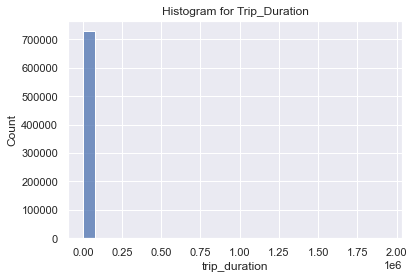

In [50]:
# Plotting a Histogram to inspect distribution and outliers
plt.title('Histogram for Trip_Duration')
sns.histplot(df['trip_duration'], kde=False, bins=25)

<AxesSubplot:title={'center':'Boxplot for Trip_Duration'}, xlabel='trip_duration'>

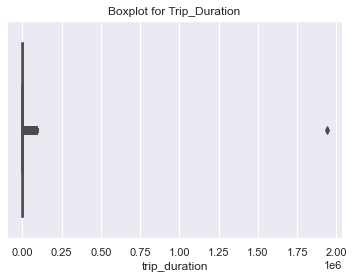

In [51]:
plt.title('Boxplot for Trip_Duration')
sns.boxplot(x = df['trip_duration'])

In [52]:
# Checking the outlier 
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_by_month,dropoff_by_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_day,dropoff_by_day,pickup_by_hour,dropoff_by_hour,pickup_part_of_day,dropoff_part_of_day
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,...,1,1,1,2,Tuesday,Wednesday,0,11,Night,Morning


In [53]:
# Dopping the outlier
df.drop(df[df['trip_duration'] == 1939736.00].index, inplace = True)

In [54]:
# Checking the new maximum value for trip duration
df[df['trip_duration'] == df['trip_duration'].max()]['trip_duration']

259437    86391
Name: trip_duration, dtype: int64

### Univariate Analysis for for vendor_id

In [55]:
df['vendor_id'].describe()

count    729321.000000
mean          1.535403
std           0.498745
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: vendor_id, dtype: float64

In [56]:
extra_stats('vendor_id')

Mode = 0    2
dtype: int64
Skew = -0.14197025212279726
Kurtosis = -1.9798444475121897


<AxesSubplot:xlabel='vendor_id', ylabel='count'>

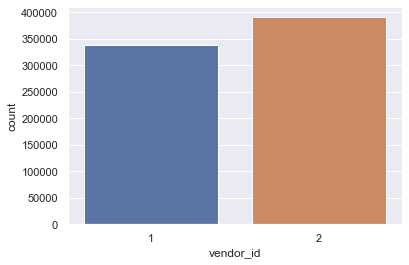

In [57]:
sns.countplot(x='vendor_id', data=df)

### Univariate Analysis for passenger_count

In [58]:
df['passenger_count'].describe()

count    729321.000000
mean          1.662056
std           1.312446
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64

In [59]:
df.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

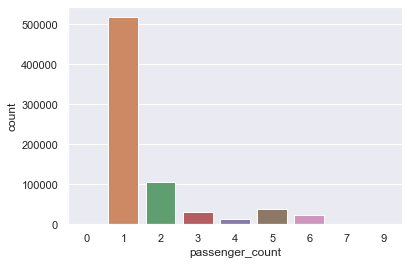

In [60]:
sns.countplot(x = 'passenger_count', data=df)

### Univariate Analysis for pickup_by_day and dropoff_by_day

In [61]:
df['pickup_by_day'].describe()

count     729321
unique         7
top       Friday
freq      111744
Name: pickup_by_day, dtype: object

In [62]:
df['dropoff_by_day'].describe()

count     729321
unique         7
top       Friday
freq      111509
Name: dropoff_by_day, dtype: object

<AxesSubplot:xlabel='pickup_by_day', ylabel='count'>

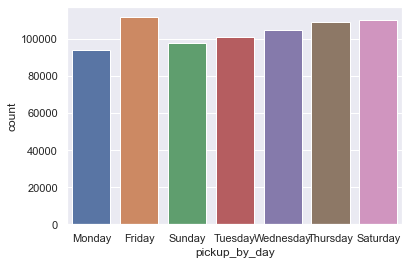

In [63]:
sns.countplot(x = 'pickup_by_day', data=df)

<AxesSubplot:xlabel='dropoff_by_day', ylabel='count'>

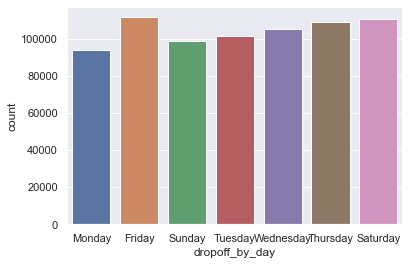

In [64]:
sns.countplot(x = 'dropoff_by_day', data=df)

### Bivariate Analysis

<AxesSubplot:xlabel='pickup_by_hour', ylabel='trip_duration'>

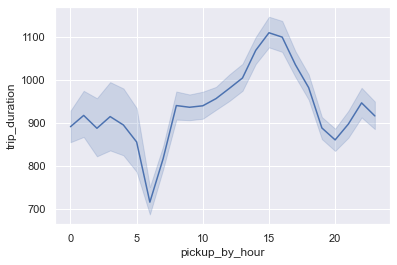

In [65]:
# Trip Duration per hour
sns.lineplot(x='pickup_by_hour', y='trip_duration', data=df)

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

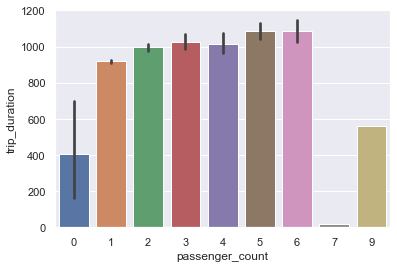

In [66]:
# Trip duration per passanger count
sns.barplot(x='passenger_count',y='trip_duration', data=df)

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

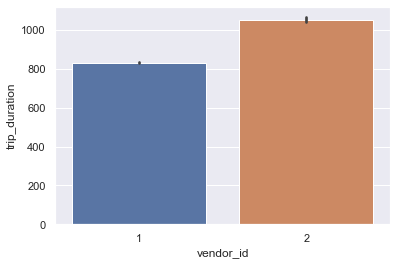

In [67]:
#trip duration by vendor id
sns.barplot(x='vendor_id', y='trip_duration', data=df)

<AxesSubplot:xlabel='pickup_by_day', ylabel='trip_duration'>

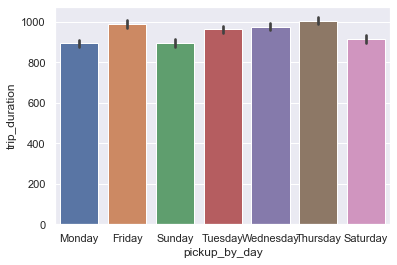

In [68]:
# Trip Duration by Day of the Week
sns.barplot(x="pickup_by_day", y='trip_duration', data=df)

<AxesSubplot:xlabel='pickup_part_of_day', ylabel='trip_duration'>

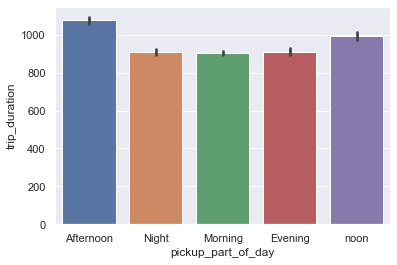

In [69]:
# Trip Duration by pickup part of the day
sns.barplot(x="pickup_part_of_day", y='trip_duration', data=df)

### Multivariate Analysis

In [70]:
# Calculating the correlation
corr =df.corr()
print(corr)

                    vendor_id  passenger_count  pickup_longitude  \
vendor_id            1.000000         0.286462          0.008202   
passenger_count      0.286462         1.000000          0.001164   
pickup_longitude     0.008202         0.001164          1.000000   
pickup_latitude      0.002857        -0.004698          0.047648   
dropoff_longitude    0.002371        -0.000027          0.780649   
dropoff_latitude     0.005260        -0.003944          0.118472   
trip_duration        0.035205         0.016520          0.041561   
pickup_by_month     -0.005365        -0.001482          0.004043   
dropoff_by_month    -0.005338        -0.001498          0.004096   
pickup_by_weekday    0.000786         0.025757         -0.016027   
dropoff_by_weekday   0.000899         0.025940         -0.016844   
pickup_by_hour       0.009769         0.009849          0.010762   
dropoff_by_hour      0.009701         0.009214          0.011172   

                    pickup_latitude  dropoff_lo

<AxesSubplot:>

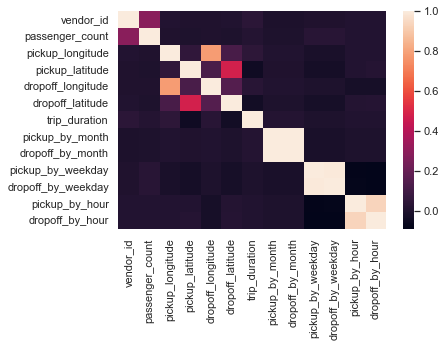

In [71]:
# Visualizing the relationship based on correlation
sns.heatmap(corr)

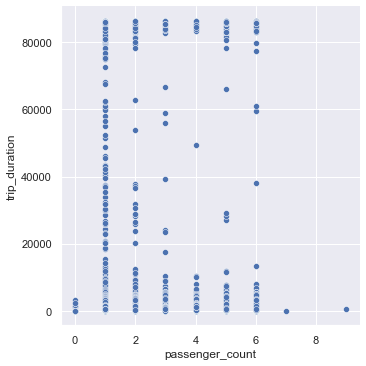

In [72]:
sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")

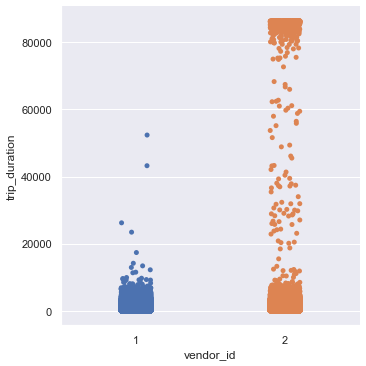

In [73]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)

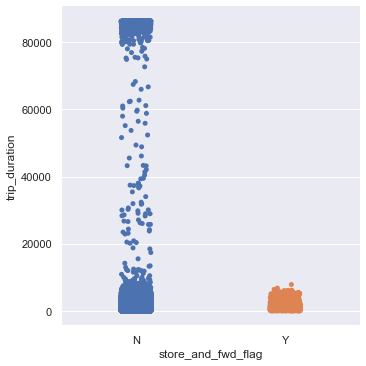

In [74]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)